In [8]:
import pandas as pd
from sklearn.linear_model import GammaRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pd.set_option('display.max_rows', 500)


## Loading data

In [10]:
path2021 = "../data/uefa-data/processed/2021_"
path2020 = "../data/uefa-data/processed/2020_"

playerStats = pd.read_csv(path2021 + "player_stats.csv")
defense = pd.read_csv(path2021 + "defense.csv")
goalkeeping = pd.read_csv(path2021 + "goalkeeping.csv")
passing = pd.read_csv(path2021 + "passing.csv")
shooting = pd.read_csv(path2021 + "shooting.csv")
mv2020 = pd.read_csv(path2020 + "mv.csv")


defense = playerStats.merge(defense, on = "Player")
goalkeeping = playerStats.merge(goalkeeping, on = "Player")
passing = playerStats.merge(passing, on = "Player")
shooting = playerStats.merge(shooting, on = "Player")

path = "../data/processed-data/"

raritaDf = pd.read_csv(path + "l_defense_clean.csv", index_col = 0)
raritaPs = pd.read_csv(path + "l_passing_clean.csv", index_col = 0)
raritaGk = pd.read_csv(path + "l_goalkeeping_clean.csv", index_col = 0)
raritaSh = pd.read_csv(path + "l_shooting_clean.csv", index_col = 0)
salary2020 = pd.read_csv(path + "salary_2020.csv", index_col = 0)
salary2021 = pd.read_csv(path + "salary_2021.csv", index_col = 0)


In [15]:
defense.to_csv("uefa-defense.csv")
goalkeeping.to_csv("uefa-goalkeeping.csv")
passing.to_csv("uefa-passing.csv")
shooting.to_csv("uefa-shooting.csv")

## Data exploration

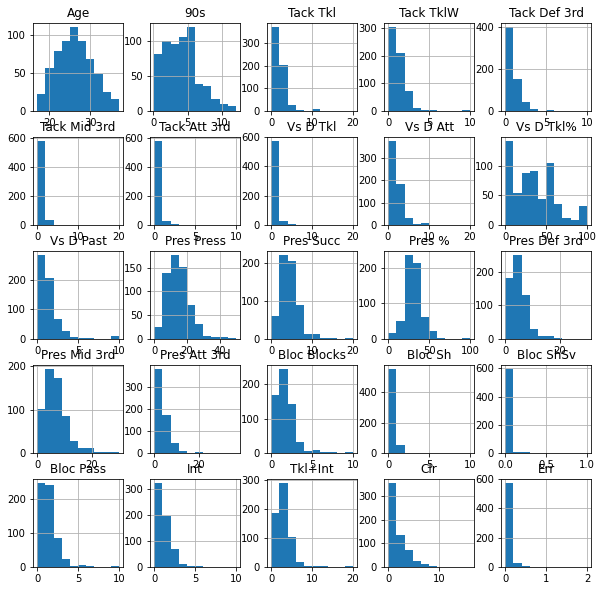

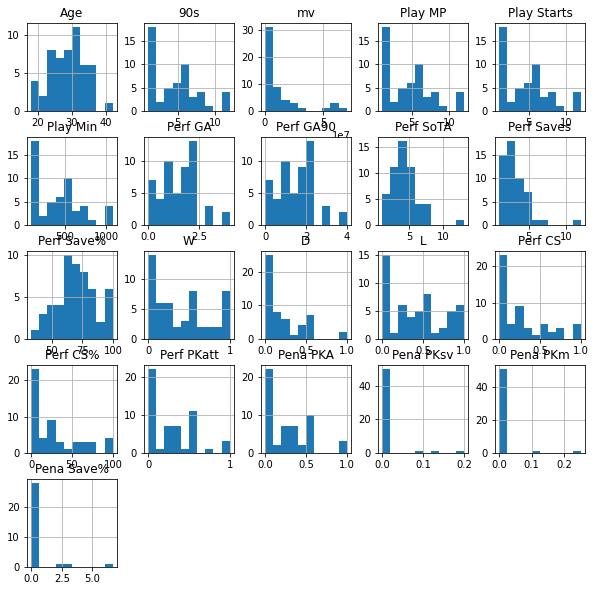

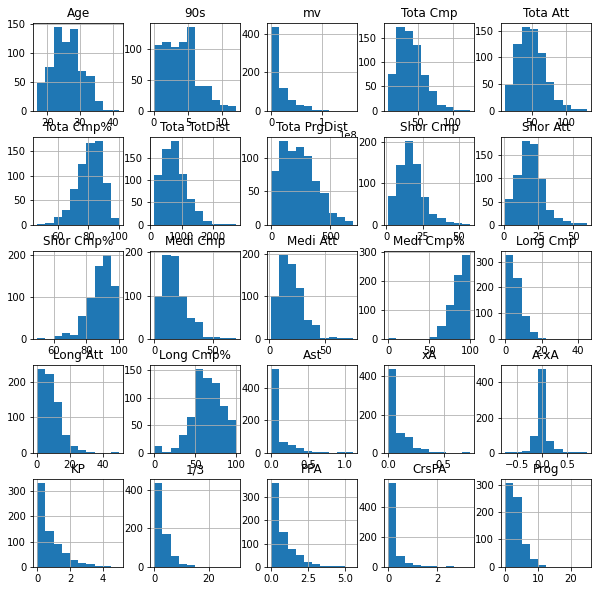

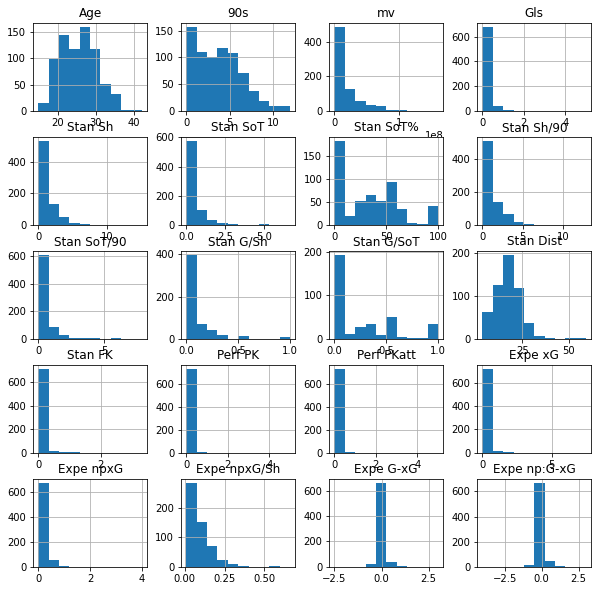

In [13]:
defense.dropna()[['Player', 'Age', '90s', 'Tack Tkl',
       'Tack TklW', 'Tack Def 3rd', 'Tack Mid 3rd', 'Tack Att 3rd', 'Vs D Tkl',
       'Vs D Att', 'Vs D Tkl%', 'Vs D Past', 'Pres Press', 'Pres Succ',
       'Pres %', 'Pres Def 3rd', 'Pres Mid 3rd', 'Pres Att 3rd', 'Bloc Blocks',
       'Bloc Sh', 'Bloc ShSv', 'Bloc Pass', 'Int', 'Tkl+Int', 'Clr', 'Err']].hist(figsize=(10,10))
goalkeeping.drop(columns = ["GK", "MF", "DF", "FW"]).hist(figsize=(10,10))
passing.drop(columns = ["GK", "MF", "DF", "FW"]).dropna().hist(figsize=(10,10))
shooting.drop(columns = ["GK", "MF", "DF", "FW"]).hist(figsize=(10,10))

defense.to_csv("df.csv")

def plotFeatures(data): 
    X = data.iloc[:,8:]  #independent columns
    y = data.iloc[:,4]    #target column i.e price range
    #get correlations of each features in dataset
    corrmat = data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(method = "kendall"),annot=True,cmap="RdYlGn")

# diagnostic plots

#salary2020.hist(column = "Annualized Salary", bins = 20)
#salary2021.hist(column = "Annualized Salary", bins = 20)

#plotFeatures(defense)
#plotFeatures(goalkeeping)
#plotFeatures(passing)
#plotFeatures(shooting)

## Data cleaning

In [86]:

# These are all the 'important' features from visually inspecting the correlation heatmap
df = defense.loc[defense["DF"] == 1]
df = df[["mv",  "Age", "90s", "Tack Tkl", "Tack TklW", "Tack Mid 3rd", "Tack Att 3rd", "Vs D Tkl", "Vs D Past", "Pres Succ", "Pres Mid 3rd", "Bloc Sh", "Bloc Pass", "Int"]]

sh = shooting.loc[shooting["FW"] == 1]
sh = sh[["mv",  "Age", "90s", "Gls", "Stan Sh", "Stan SoT", "Stan G/Sh", "Stan FK", "Perf PK", "Perf PKatt", "Expe xG", "Expe npxG", "Expe npxG/Sh"]]

gk = goalkeeping.loc[goalkeeping["GK"] == 1]
gk = gk[["mv", "Age", "90s", "Play MP", "Play Starts",  "Perf GA", "Perf SoTA", "W", "Perf CS", "Perf CS%", "Pena PKA"]]

ps = passing.loc[passing["MF"] == 1]
ps = ps[["mv", "Age", "90s", "Tota Cmp", "Tota Att", "Tota TotDist", "Shor Cmp", "Shor Att", "Long Cmp%", "Ast", "xA", "KP", "1/3", "PPA", "CrsPA", "Prog"]]
ps["Tota TotDist"] = ps["Tota TotDist"]/100

def remove_empty_rows(df: pd.DataFrame):
    # threshold for zero
    threshold = 0.1

    num = len(df.columns) - 3

    for i, row in df.iterrows():
        count = 0
        for j in row[3:]:
            if ((j < threshold or pd.isna(j))):
                count += 1

        if (count / num > 0.8):
            df = df.drop(i)
    return df;

sh = remove_empty_rows(sh)
df = remove_empty_rows(df)
ps = remove_empty_rows(ps)
gk = remove_empty_rows(gk)

df = df.dropna()
ps = ps.dropna()
sh = sh.dropna()
gk = gk.dropna()

In [87]:
raritaDf = raritaDf.loc[raritaDf["Year"] == 2021]
raritaSh = raritaSh.loc[raritaSh["Year"] == 2021]
raritaGk = raritaGk.loc[raritaGk["Year"] == 2021]
raritaPs = raritaPs.loc[raritaPs["Year"] == 2021]

raritaDf = raritaDf.loc[raritaDf["DF"] == 1]
raritaDf = raritaDf[["Player","Squad","Age", "90s", "Tackles Tkl", "Tackles TklW", "Tackles Mid 3rd", "Tackles Att 3rd", "Vs Dribbles Tkl", "Vs Dribbles Past", "Pressures Succ", "Pressures Mid 3rd", 'Blocks Sh', "Blocks Pass", "Int"]]

raritaSh = raritaSh.loc[raritaSh["FW"] == 1]
raritaSh = raritaSh[["Player","Squad","Age", "90s", "Gls", "Standard Sh", "Standard SoT", "Standard G/Sh", "Standard FK", "Performance PK", "Performance PKatt", "Expected xG", "Expected npxG", "Expected npxG/Sh"]]

raritaGk = raritaGk.loc[raritaGk["GK"] == 1]
raritaGk = raritaGk[["Player","Squad","Age", "Playing Time 90s", "Playing Time MP", "Playing Time Starts",  "Performance GA", "Performance SoTA", "W", "Performance CS", "Performance CS%", "Penalty Kicks PKA"]]
raritaGk = raritaGk.rename(columns={"Playing Time 90s": "90s"})

raritaPs = raritaPs.loc[raritaPs["MF"] == 1]
raritaPs = raritaPs[["Player","Squad", "Age", "90s", "Total Cmp", "Total Att", "Total TotDist", "Short Cmp", "Short Att", "Long Cmp%", "Ast", "xA", "KP", "1/3", "PPA", "CrsPA", "Prog", "League"]]
raritaPs["Total TotDist"] = raritaPs["Total TotDist"]/100


# process all negatives
# from this we can see there's no negative values beyond -0.1
# might be a reasonable assumption to convert these all to 0
for i, s in raritaDf.drop(columns = ["Player","Squad"]).iteritems():
    print(i, len(s[s < -0])/len(s), len(s[s < -0.1])/len(s))

for i, s in raritaSh.drop(columns = ["Player","Squad"]).iteritems():
    print(i, len(s[s < -0])/len(s), len(s[s < -0.1])/len(s))

for i, s in raritaGk.drop(columns = ["Player","Squad"]).iteritems():
    print(i, len(s[s < -0])/len(s), len(s[s < -0.1])/len(s))

for i, s in raritaPs.drop(columns = ["Player","Squad", "League"]).iteritems():
    print(i, len(s[s < -0])/len(s), len(s[s < -0.1])/len(s))

for i in [raritaDf, raritaGk, raritaSh, raritaPs]:
    num = i._get_numeric_data()
    num[num < 0] = 0


Age 0.0 0.0
90s 0.00625 0.0
Tackles Tkl 0.020535714285714286 0.0
Tackles TklW 0.039285714285714285 0.0
Tackles Mid 3rd 0.049107142857142856 0.0
Tackles Att 3rd 0.19375 0.0
Vs Dribbles Tkl 0.060714285714285714 0.0
Vs Dribbles Past 0.03571428571428571 0.0
Pressures Succ 0.0125 0.0
Pressures Mid 3rd 0.01607142857142857 0.0
Blocks Sh 0.08214285714285714 0.0
Blocks Pass 0.025 0.0
Int 0.05 0.0
Age 0.0 0.0
90s 0.013278855975485188 0.0
Gls 0.1634320735444331 0.0
Standard Sh 0.04698672114402452 0.0
Standard SoT 0.09090909090909091 0.0
Standard G/Sh 0.1491317671092952 0.0
Standard FK 0.3564862104187947 0.0
Performance PK 0.4279877425944842 0.0
Performance PKatt 0.3718079673135853 0.0
Expected xG 0.06230847803881512 0.0
Expected npxG 0.07967313585291114 0.0
Expected npxG/Sh 0.045965270684371805 0.0
Age 0.0 0.0
90s 0.004807692307692308 0.0
Playing Time MP 0.0 0.0
Playing Time Starts 0.02403846153846154 0.0
Performance GA 0.014423076923076924 0.0
Performance SoTA 0.0 0.0
W 0.11538461538461539 0.0
P

In [88]:
# Converting rows into per 90 values as they seem to not be converted...
problem = raritaPs.loc[(raritaPs["League"] == "D") | (raritaPs["Squad"] == "Black Coyotes") | (raritaPs["Squad"] == "Serious Buffaloes") | (raritaPs["Squad"] == "Strong Oaks")]
convert = problem.columns.difference(["Player", "Squad","Age", "90s", "Long Cmp%", "League"])
problem[convert] = problem[convert].div(problem["90s"], axis = 0).round(decimals = 2)
raritaPs.loc[(raritaPs["League"] == "D") | (raritaPs["Squad"] == "Black Coyotes") | (raritaPs["Squad"] == "Serious Buffaloes") | (raritaPs["Squad"] == "Strong Oaks")] = problem

raritaPs = raritaPs.drop(columns = "League")
# raritaPs.boxplot(figsize = (10,10))



In [89]:
# join salary for visualisation later
def joinSalary(frame):
    frame = frame.dropna()
    frame = pd.merge(frame, salary2021[["Player Name", "Squad", "Annualized Salary"]], right_on = ["Player Name", "Squad"], left_on=["Player", "Squad"])
    return frame.drop(columns = "Player Name")

raritaPs = joinSalary(raritaPs)
raritaGk = joinSalary(raritaGk)
raritaSh = joinSalary(raritaSh)
raritaDf = joinSalary(raritaDf)



## Building model

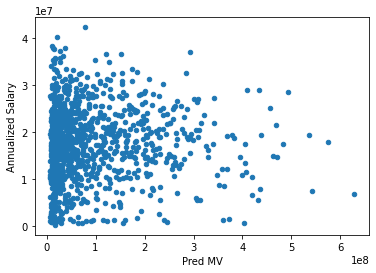

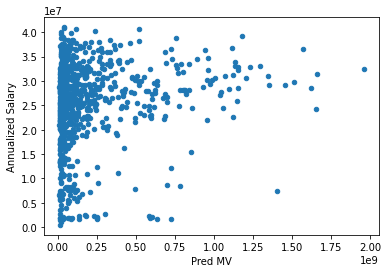

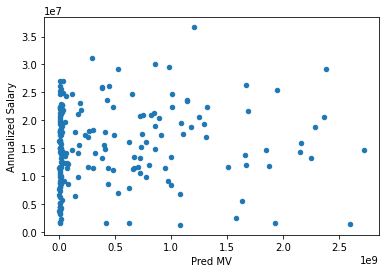

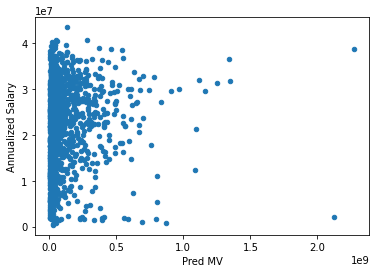

In [90]:

def fitModel(data):
    # make train + test split
    X = data.drop(columns = ["mv"])
    y = data["mv"]

    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 114514)

    model = make_pipeline(StandardScaler(), GammaRegressor(max_iter=1000))
    model.fit(XTrain, yTrain)

    #plt.scatter(x= model.predict(XTrain), y =yTrain-model.predict(XTrain))
    
    yPred = model.predict(XTest)
    return model

import warnings
warnings.filterwarnings('ignore') 

def showFit(data, raritaData):
    model = fitModel(data)
    predMV  =1.141*model.predict(raritaData.dropna().drop(columns = ["Player", "Squad","Annualized Salary"]))

    frame = pd.concat([raritaData.dropna(), pd.Series(predMV)], axis = 1)
    frame = pd.DataFrame(frame)
    frame = frame.rename({0: "Pred MV"}, axis = "columns")
    frame.plot.scatter(x = "Pred MV", y = "Annualized Salary")

showFit(df, raritaDf)
showFit(sh, raritaSh)
showFit(gk, raritaGk)
showFit(ps, raritaPs)



